In [ ]:
import pandas as pd
import os

# Set the Kaggle API credentials as environment variables
os.environ['KAGGLE_USERNAME'] = 'YOUR_KAGGLE_USERNAME' # Replace with your Kaggle username
os.environ['KAGGLE_KEY'] = 'YOUR_KAGGLE_KEY'       # Replace with your Kaggle API key

# Download the dataset using the Kaggle API
!kaggle datasets download -d saurabhshahane/ecommerce-text-classification -p /tmp/ecommerce_data --unzip

# Define the path to the downloaded CSV file
csv_file_path = '/tmp/ecommerce_data/ecommerce_text_classification.csv'

# Check if the file exists before attempting to read it
if os.path.exists(csv_file_path):
    # Read the downloaded CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Display the first few rows of the DataFrame and its information
    display(df.head())
    display(df.info())
else:
    print(f"Error: The file {csv_file_path} was not found.")
    df = None # Set df to None to indicate that the DataFrame was not loaded


Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/7.86M [00:00<?, ?B/s]
100% 7.86M/7.86M [00:00<00:00, 187MB/s]
Error: The file /tmp/ecommerce_data/ecommerce_text_classification.csv was not found.


In [ ]:
import os

# List the contents of the downloaded directory to find the correct file name
download_dir = '/tmp/ecommerce_data'
if os.path.exists(download_dir):
    print(f"Contents of {download_dir}:")
    for item in os.listdir(download_dir):
        print(item)
else:
    print(f"Download directory not found: {download_dir}")


Contents of /tmp/ecommerce_data:
ecommerceDataset.csv


In [ ]:
import pandas as pd

# Read the downloaded CSV file into a pandas DataFrame
csv_file_path = '/tmp/ecommerce_data/ecommerceDataset.csv'
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame and its information
display(df.head())
display(df.info())

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

None

In [ ]:
# Rename columns for clarity
df.columns = ['Category', 'Description']

# Drop the first row which is a duplicate header
df = df.iloc[1:].copy()

display(df.head())

,Category,Description
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
5,Household,Paper Plane Design Starry Night Vangoh Wall Ar...


In [ ]:
print("Missing values before handling:")
display(df.isnull().sum())

# Handle missing values (e.g., by dropping rows with missing values)
df.dropna(inplace=True)

print("\nMissing values after handling:")
display(df.isnull().sum())

Missing values before handling:


,0
Category,0
Description,1



Missing values after handling:


,0
Category,0
Description,0


In [ ]:
print("Unique categories and their counts:")
display(df['Category'].value_counts())

Unique categories and their counts:


,count
Category,
Household,19311
Books,11820
Electronics,10621
Clothing & Accessories,8670


In [ ]:
import re
import string

# Convert text to lowercase
df['Description'] = df['Description'].str.lower()

# Remove punctuation
df['Description'] = df['Description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove numerical digits
df['Description'] = df['Description'].apply(lambda x: re.sub(r'\d+', '', x))

print("First few entries of the cleaned 'Description' column:")
display(df.head())

First few entries of the cleaned 'Description' column:


,Category,Description
1,Household,saf uv textured modern art print framed painti...
2,Household,saf flower print framed painting synthetic in...
3,Household,incredible gifts india wooden happy birthday u...
4,Household,pitaara box romantic venice canvas painting mm...
5,Household,paper plane design starry night vangoh wall ar...


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and a combined validation/test set
df_train, df_vt = train_test_split(df, test_size=0.2, stratify=df['Category'], random_state=42)

# Split the combined validation/test set into validation and test sets
df_val, df_test = train_test_split(df_vt, test_size=0.5, stratify=df_vt['Category'], random_state=42)

display(f"Training set shape: {df_train.shape}")
display(f"Validation set shape: {df_val.shape}")
display(f"Test set shape: {df_test.shape}")

'Training set shape: (40337, 2)'

'Validation set shape: (5042, 2)'

'Test set shape: (5043, 2)'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(df_train['Description'])

# Transform the validation data
X_val = vectorizer.transform(df_val['Description'])

# Transform the test data
X_test = vectorizer.transform(df_test['Description'])

display(f"Shape of X_train: {X_train.shape}")
display(f"Shape of X_val: {X_val.shape}")
display(f"Shape of X_test: {X_test.shape}")

'Shape of X_train: (40337, 87892)'

'Shape of X_val: (5042, 87892)'

'Shape of X_test: (5043, 87892)'

In [ ]:
y_train = df_train['Category']
y_val = df_val['Category']
y_test = df_test['Category']

display(f"Shape of y_train: {y_train.shape}")
display(f"Shape of y_val: {y_val.shape}")
display(f"Shape of y_test: {y_test.shape}")

'Shape of y_train: (40337,)'

'Shape of y_val: (5042,)'

'Shape of y_test: (5043,)'

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instantiate the models
model_nb = MultinomialNB()
model_lr = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model_svm = LinearSVC(max_iter=1000) # Increased max_iter for convergence
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the models
print("Training Multinomial Naive Bayes...")
model_nb.fit(X_train, y_train)
print("Training Logistic Regression...")
model_lr.fit(X_train, y_train)
print("Training Linear SVM...")
model_svm.fit(X_train, y_train)
print("Training Random Forest Classifier...")
model_rf.fit(X_train, y_train)

print("All models trained successfully.")

Training Multinomial Naive Bayes...
Training Logistic Regression...
Training Linear SVM...
Training Random Forest Classifier...
All models trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Evaluate Multinomial Naive Bayes model
y_pred_nb = model_nb.predict(X_val)
accuracy_nb = accuracy_score(y_val, y_pred_nb)
report_nb = classification_report(y_val, y_pred_nb)
print("Multinomial Naive Bayes Performance on Validation Set:")
print(f"Accuracy: {accuracy_nb:.4f}")
print("Classification Report:")
print(report_nb)

# Evaluate Logistic Regression model
y_pred_lr = model_lr.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
report_lr = classification_report(y_val, y_pred_lr)
print("\nLogistic Regression Performance on Validation Set:")
print(f"Accuracy: {accuracy_lr:.4f}")
print("Classification Report:")
print(report_lr)

# Evaluate Linear SVM model
y_pred_svm = model_svm.predict(X_val)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
report_svm = classification_report(y_val, y_pred_svm)
print("\nLinear SVM Performance on Validation Set:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("Classification Report:")
print(report_svm)

# Evaluate Random Forest Classifier model
y_pred_rf = model_rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
report_rf = classification_report(y_val, y_pred_rf)
print("\nRandom Forest Classifier Performance on Validation Set:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(report_rf)

Multinomial Naive Bayes Performance on Validation Set:
Accuracy: 0.9407
Classification Report:
                        precision    recall  f1-score   support

                 Books       0.97      0.92      0.95      1182
Clothing & Accessories       0.98      0.93      0.95       867
           Electronics       0.96      0.90      0.93      1062
             Household       0.90      0.98      0.94      1931

              accuracy                           0.94      5042
             macro avg       0.95      0.93      0.94      5042
          weighted avg       0.94      0.94      0.94      5042


Logistic Regression Performance on Validation Set:
Accuracy: 0.9671
Classification Report:
                        precision    recall  f1-score   support

                 Books       0.97      0.96      0.96      1182
Clothing & Accessories       0.98      0.98      0.98       867
           Electronics       0.97      0.95      0.96      1062
             Household       0.96      0.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate Multinomial Naive Bayes model on the test set
y_pred_nb_test = model_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
report_nb_test = classification_report(y_test, y_pred_nb_test)
print("Multinomial Naive Bayes Performance on Test Set:")
print(f"Accuracy: {accuracy_nb_test:.4f}")
print("Classification Report:")
print(report_nb_test)

# Evaluate Logistic Regression model on the test set
y_pred_lr_test = model_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
report_lr_test = classification_report(y_test, y_pred_lr_test)
print("\nLogistic Regression Performance on Test Set:")
print(f"Accuracy: {accuracy_lr_test:.4f}")
print("Classification Report:")
print(report_lr_test)

# Evaluate Linear SVM model on the test set
y_pred_svm_test = model_svm.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
report_svm_test = classification_report(y_test, y_pred_svm_test)
print("\nLinear SVM Performance on Test Set:")
print(f"Accuracy: {accuracy_svm_test:.4f}")
print("Classification Report:")
print(report_svm_test)

# Evaluate Random Forest Classifier model on the test set
y_pred_rf_test = model_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
report_rf_test = classification_report(y_test, y_pred_rf_test)
print("\nRandom Forest Classifier Performance on Test Set:")
print(f"Accuracy: {accuracy_rf_test:.4f}")
print("Classification Report:")
print(report_rf_test)

Multinomial Naive Bayes Performance on Test Set:
Accuracy: 0.9385
Classification Report:
                        precision    recall  f1-score   support

                 Books       0.97      0.92      0.95      1182
Clothing & Accessories       0.98      0.93      0.96       867
           Electronics       0.96      0.89      0.93      1062
             Household       0.89      0.98      0.93      1932

              accuracy                           0.94      5043
             macro avg       0.95      0.93      0.94      5043
          weighted avg       0.94      0.94      0.94      5043


Logistic Regression Performance on Test Set:
Accuracy: 0.9647
Classification Report:
                        precision    recall  f1-score   support

                 Books       0.97      0.96      0.97      1182
Clothing & Accessories       0.98      0.97      0.98       867
           Electronics       0.97      0.94      0.95      1062
             Household       0.95      0.98      0.96

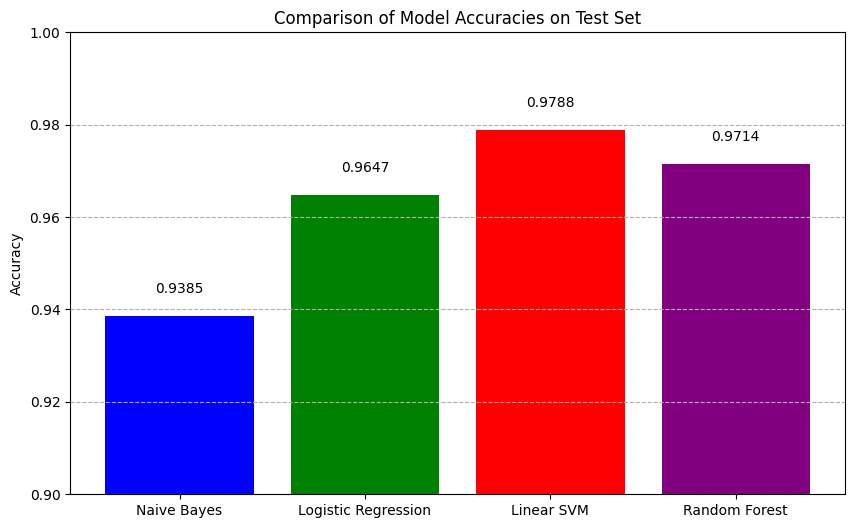

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their test accuracies
model_names = ['Naive Bayes', 'Logistic Regression', 'Linear SVM', 'Random Forest']
test_accuracies = [accuracy_nb_test, accuracy_lr_test, accuracy_svm_test, accuracy_rf_test]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies on Test Set')
plt.ylim(0.9, 1.0) # Set y-axis limits to focus on the differences
plt.grid(axis='y', linestyle='--')

# Add accuracy values on top of the bars
for i, acc in enumerate(test_accuracies):
    plt.text(i, acc + 0.005, f'{acc:.4f}', ha='center')

plt.show()

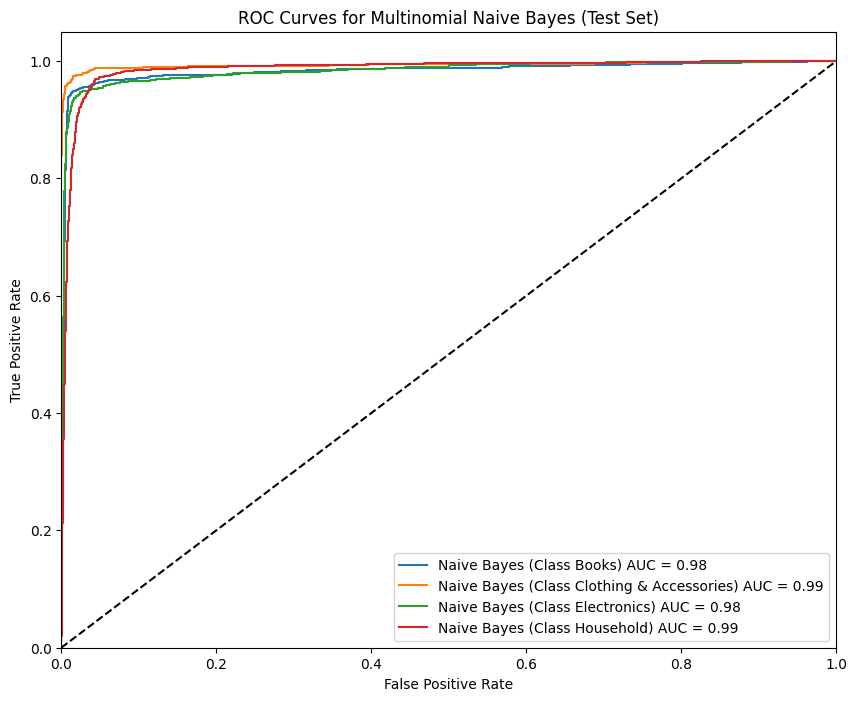

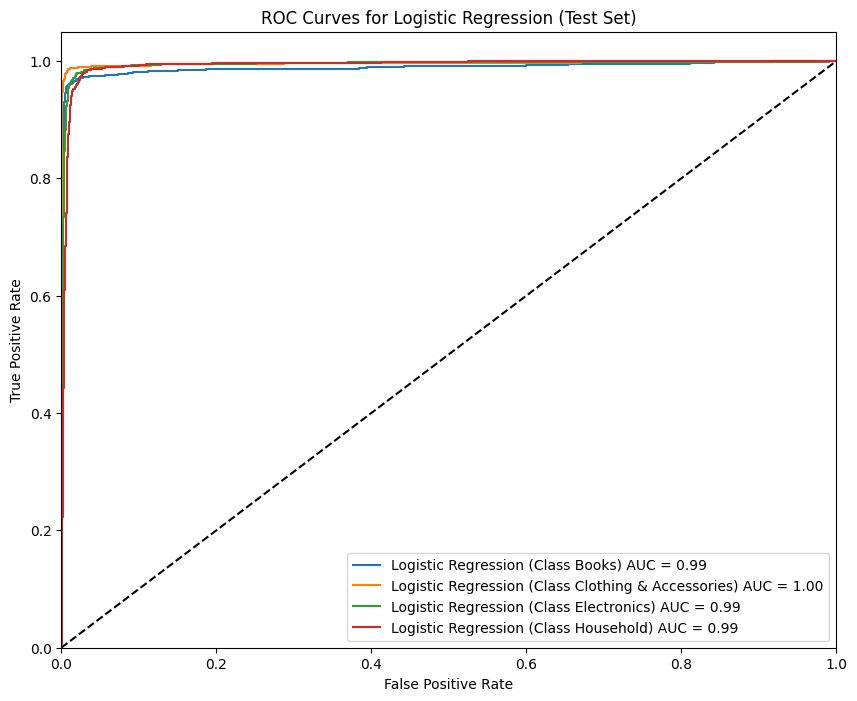

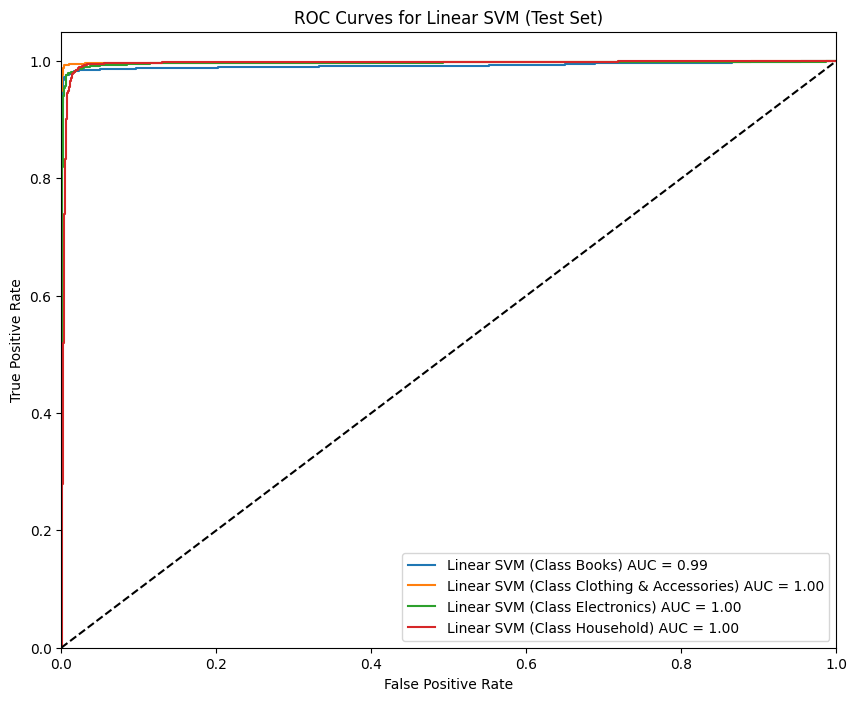

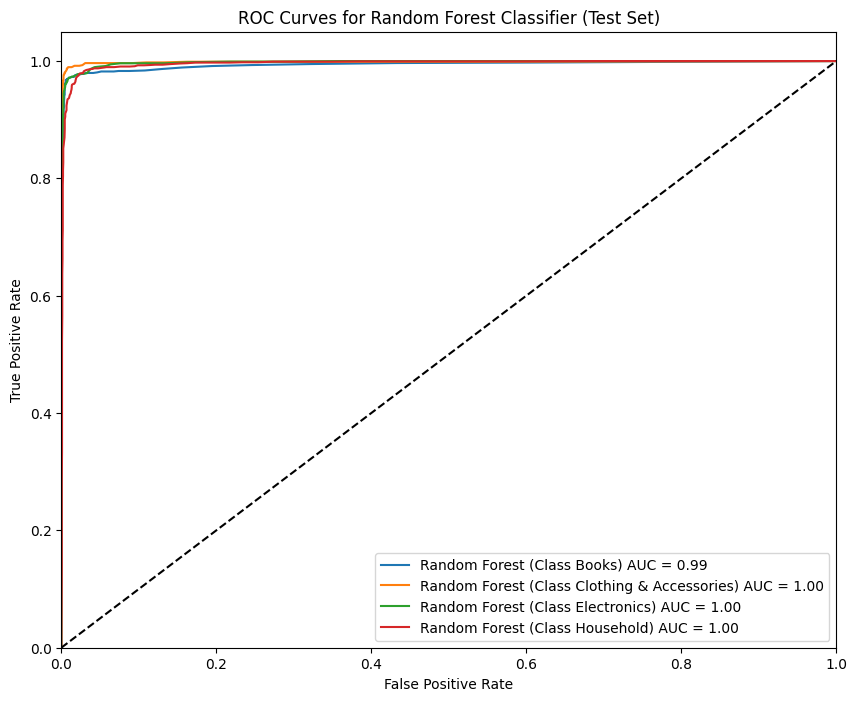

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for ROC curve (only for models that support predict_proba)
# Multinomial Naive Bayes
y_prob_nb = model_nb.predict_proba(X_test)

# Logistic Regression
y_prob_lr = model_lr.predict_proba(X_test)

# Random Forest Classifier
y_prob_rf = model_rf.predict_proba(X_test)

# LinearSVC does not have predict_proba. We can use decision_function instead.
y_score_svm = model_svm.decision_function(X_test)

# Get the unique classes
classes = model_nb.classes_

# Plot ROC curves for each class for Multinomial Naive Bayes
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test, y_prob_nb[:, i], pos_label=classes[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Naive Bayes (Class {classes[i]}) AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multinomial Naive Bayes (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curves for each class for Logistic Regression
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test, y_prob_lr[:, i], pos_label=classes[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Logistic Regression (Class {classes[i]}) AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curves for each class for Linear SVM
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test, y_score_svm[:, i], pos_label=classes[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Linear SVM (Class {classes[i]}) AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Linear SVM (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curves for each class for Random Forest Classifier
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test, y_prob_rf[:, i], pos_label=classes[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Random Forest (Class {classes[i]}) AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest Classifier (Test Set)')
plt.legend(loc="lower right")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


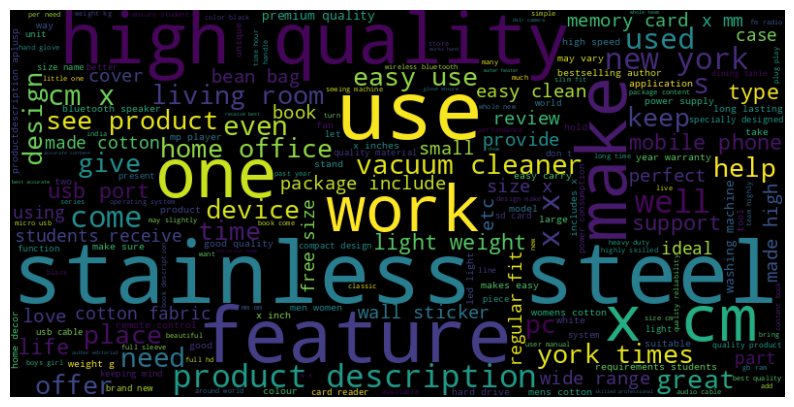

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords if you haven't already
nltk.download('stopwords')

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

# Apply the function to the 'Description' column
df['Description_no_stopwords'] = df['Description'].apply(lambda x: remove_stopwords(x))

# Combine all the text without stop words into a single string
all_text_no_stopwords = " ".join(review for review in df['Description_no_stopwords'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_text_no_stopwords)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()